## Topic Modelling using Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) in sklearn

### **There also exists implementation using the Gensim library. Checkout the same [here](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)  ,   [here](https://nlpforhackers.io/topic-modeling/) and [here](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/) and also in [this](https://github.com/susanli2016/NLP-with-Python/blob/master/LDA_news_headlines.ipynb) notebook.**

## [Please star/upvote in case u like it. ]

#### IMPORTING MODULES

In [1]:
! pip install seaborn

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import nltk
nltk.download('stopwords')
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### LOADING THE DATASET

In [3]:
df=pd.read_csv("dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [ ]:
df.head(93)

,Judul,Penulis,Pembimbing 1,Pembimbing 2,abstrak,Kata Kunci,Label
0,SISTEM PENENTUAN STATUS GIZI PASIEN RAWAT INAP...,Nur Anggraeni,"Diana Rahmawati, ST.M.T","Firli Irhamni, ST.M.Kom",Di Indonesia masalah perkembangan gizi adalah ...,"Naïve Bayes Classifier, Sistem Pendukung Keput...",RPL
1,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,-,CAI
2,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,M. Basith Ardianto,"Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,"Algoritma Genetika, Optimasi, Penjadwalan",RPL
3,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,-,CAI
4,SISTEM INFORMASI PERUSAHAAN OTOBUS SUMBER KENC...,Elky Lilik Misdayani,"Fitri Damayanti,S.Kom,M.Kom",-,Sistem informasi pengolahan data yang dibutuhk...,-,RPL
...,...,...,...,...,...,...,...
87,PENGENALAN TULISAN TANGAN HURUF ALFABET DENGAN...,Hilyati Safitri,"Fitri Damayanti S.Kom., M.Kom","Kurniawan Eka Permana S.Kom., M.Sc.",Pengenalan tulisan tangan merupakan topik pene...,"Tulisan Tangan, Modified Direction Feature, Le...",CAI
88,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",Kantor Badan Kepegawaian kota Bangkalan adalah...,"Arsitektur interprise, TOGAF ADM, Arsitektur b...",RPL
89,RANCANG BANGUN APLIKASI PEMILIHAN TEKNIK REKAY...,Lia Fransiska,"Firli Irhamni S.T, M.Kom","Budi Dwi Satoto S.T, M.Kom",Penyusunan Sistem Pendukung Keputusan pemiliha...,"Sistem Pendukung Keputusan, Teknik Rekayasa Ke...",RPL
90,DETEKSI COREPOINT SIDIK JARI MENGGUNAKAN METOD...,Erwina Safitri,"Dr. Indah Agustien, S.Kom., M.Kom","Fitri Damayanti, S.Kom., M.Kom",Sidik jari adalah salah satu karakteristik fis...,"Sidik jari, Corepoint, Geometry Of Region Tech...",CAI


We will drop the **'publish_date'** column as it is useless for our discussion.

In [ ]:
# drop the publish date.
df.drop(['Judul','Penulis','Pembimbing 1','Pembimbing 2','Kata Kunci','Label'],axis=1,inplace=True)

In [ ]:
df.head(93)

,abstrak
0,Di Indonesia masalah perkembangan gizi adalah ...
1,Seiring perkembangan teknologi yang ada diduni...
2,Berjalannya koneksi jaringan komputer dengan l...
3,Web server adalah sebuah perangkat lunak serve...
4,Sistem informasi pengolahan data yang dibutuhk...
...,...
87,Pengenalan tulisan tangan merupakan topik pene...
88,Kantor Badan Kepegawaian kota Bangkalan adalah...
89,Penyusunan Sistem Pendukung Keputusan pemiliha...
90,Sidik jari adalah salah satu karakteristik fis...


#### DATA CLEANING & PRE-PROCESSING

Here I have done the data pre-processing. I have used the lemmatizer and can also use the stemmer. Also the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.

In [ ]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [ ]:
# time taking
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
df['abstrak_cleaned_text']=df['abstrak'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
df.head(93)

,abstrak,abstrak_cleaned_text
0,Di Indonesia masalah perkembangan gizi adalah ...,Indonesia perkembangan gizi perhatian Jika sta...
1,Seiring perkembangan teknologi yang ada diduni...,Seiring perkembangan teknologi didunia muncul ...
2,Berjalannya koneksi jaringan komputer dengan l...,Berjalannya koneksi jaringan komputer lancar g...
3,Web server adalah sebuah perangkat lunak serve...,server perangkat lunak server berfungsi meneri...
4,Sistem informasi pengolahan data yang dibutuhk...,Sistem informasi pengolahan data dibutuhkan or...
...,...,...
87,Pengenalan tulisan tangan merupakan topik pene...,Pengenalan tulisan tangan topik penelitian pop...
88,Kantor Badan Kepegawaian kota Bangkalan adalah...,Kantor Badan Kepegawaian kota Bangkalan instan...
89,Penyusunan Sistem Pendukung Keputusan pemiliha...,Penyusunan Sistem Pendukung Keputusan pemiliha...
90,Sidik jari adalah salah satu karakteristik fis...,Sidik jari salah karakteristik fisik manusia i...


Can see the difference after removal of stopwords and some shorter words. aslo the words have been lemmatized as in **'calls'--->'call'.**

Now drop the unpre-processed column.

In [ ]:
df.drop(['abstrak'],axis=1,inplace=True)

In [ ]:
df.head(93)

,abstrak_cleaned_text
0,Indonesia perkembangan gizi perhatian Jika sta...
1,Seiring perkembangan teknologi didunia muncul ...
2,Berjalannya koneksi jaringan komputer lancar g...
3,server perangkat lunak server berfungsi meneri...
4,Sistem informasi pengolahan data dibutuhkan or...
...,...
87,Pengenalan tulisan tangan topik penelitian pop...
88,Kantor Badan Kepegawaian kota Bangkalan instan...
89,Penyusunan Sistem Pendukung Keputusan pemiliha...
90,Sidik jari salah karakteristik fisik manusia i...


We can also see any particular news headline.

In [ ]:
df['abstrak_cleaned_text'][0]

'Indonesia perkembangan gizi perhatian Jika status gizinya mengontrol gizi dibutuhkan tubuh Dalam penelitian dirancang aplikasi sistem pendukung keputusan menentukan status gizi pasien solusi makanan pasien sesuai riwayat penyakit derita pasien Sistem dirancang berbasis memudahkan admin ahli gizi rumah sakit penentuan status gizi pasien Diharapkan aplikasi efisien efektifitas kinerja Metode penelitian Naïve Bayes Classifier Metode terbaru memprediksi probabilitas.Metode Naïve bayes Classifier prose penentuan perhitungan probabilitas status gizi Dimana dicari nilai probabilitas terbesar kesimpulan penentuan status gizi Metode diterapkan studi Sistem Penentuan Status Gizi Pasien hasil akurasi terbesar'

#### EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

In DTM the values are the TFidf values.

Also I have specified some parameters of the Tfidf vectorizer.

Some important points:-

**1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.**

**2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.**

**3) Default values for min_df & max_df worked well.**

**4) Can try different values for ngram_range.**

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [ ]:
vect_text=vect.fit_transform(df['abstrak_cleaned_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  % sorted(inconsistent)


#### We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value; more common is the word in the news headlines.

In [ ]:
print(vect_text.shape)
print(vect_text)

(92, 1000)
  (0, 18)	0.048358944386697966
  (0, 214)	0.025178616635927558
  (0, 865)	0.05786503972311729
  (0, 164)	0.05183720921658676
  (0, 300)	0.061862610278876344
  (0, 906)	0.15886792684681533
  (0, 528)	0.037596204970856036
  (0, 137)	0.0670163750884792
  (0, 149)	0.04944502194394788
  (0, 683)	0.054598786753550725
  (0, 748)	0.029394219819368697
  (0, 739)	0.22284059584141444
  (0, 431)	0.0670163750884792
  (0, 903)	0.07943396342340767
  (0, 102)	0.14856039722760964
  (0, 56)	0.14856039722760964
  (0, 524)	0.17339557389746657
  (0, 493)	0.10929932137989017
  (0, 312)	0.05316483820556693
  (0, 172)	0.054598786753550725
  (0, 141)	0.054598786753550725
  (0, 622)	0.23901020625261435
  (0, 782)	0.0670163750884792
  (0, 779)	0.06425479755151522
  (0, 12)	0.07428019861380482
  :	:
  (91, 426)	0.07570825271127254
  (91, 134)	0.06698614467804477
  (91, 21)	0.070796216199383
  (91, 876)	0.07570825271127254
  (91, 498)	0.070796216199383
  (91, 179)	0.06387308957438843
  (91, 579)	0.05694

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['hasil'])
print(dd['wisata'])  # police is most common and forecast is least common among the news headlines.

hasil wisata
1.4054651081081644
4.839452312593311


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We can therefore see that on the basis of the **idf value** , **'police'** is the **most frequent** word while **'forecast'** is **least frequently** occuring among the news.

### TOPIC MODELLING

## Latent Semantic Analysis (LSA)

The first approach that I have used is the LSA. **LSA is basically singular value decomposition.**

**SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.**

**Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).**

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. **We can then use these vectors to find similar words and similar documents using the cosine similarity method.**

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract.
The model is then fit and transformed on the result given by vectorizer. 

**Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.**

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [ ]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 2.19197403e-01 -1.70211040e-02  5.14556885e-02  9.58213042e-02
  -1.59253260e-01  7.10236071e-01 -1.47871616e-01 -2.51457379e-01
  -9.17880155e-02  1.28422405e-02]
 [ 1.20164885e-01 -4.25647269e-02 -8.79784424e-02  1.84611397e-01
   1.23380150e-01 -2.02122572e-02 -3.17128944e-02 -8.14278693e-02
   1.19033970e-03  2.71258306e-01]
 [ 8.35455192e-02 -4.62389407e-02 -5.17464101e-02  5.43276079e-02
   3.33569265e-04  1.05403915e-02  2.59849965e-02  4.30188960e-02
   1.81783587e-02 -8.59921873e-02]
 [ 9.50874429e-02 -9.71332259e-03  1.46483579e-02  6.60138391e-02
   2.75825451e-02  5.71392595e-02 -2.21629196e-02  5.62034180e-02
  -4.83092592e-03 -7.70516941e-02]
 [ 3.38361679e-01 -2.12584957e-01 -1.92196604e-01 -1.39155752e-01
  -2.03618714e-01 -7.62859808e-02  4.67466528e-02  1.38053459e-01
  -3.08585631e-02 -8.63984667e-02]
 [ 1.23766324e-01 -2.84390366e-02 -8.07551822e-02  3.75084907e-01
   2.14113523e-01  2.92662780e-02  3.71370319e-02  1.78463692e-01
   1.00000252e-01 -2.36326206e-01

In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  21.9197403444855
Topic  1  :  -1.7021104044987774
Topic  2  :  5.145568852883142
Topic  3  :  9.58213041967027
Topic  4  :  -15.92532604495281
Topic  5  :  71.02360712643646
Topic  6  :  -14.787161602895734
Topic  7  :  -25.145737937352497
Topic  8  :  -9.178801548761582
Topic  9  :  1.2842240547175472


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [ ]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00951306  0.01813183  0.01196229 ...  0.02253667  0.01368865
   0.01281185]
 [-0.00426404  0.01167294  0.00583792 ... -0.02642902 -0.01035341
   0.03009457]
 [ 0.00486915  0.02768925  0.01360272 ... -0.04537793 -0.00828642
  -0.0054632 ]
 ...
 [ 0.01348743 -0.01773106 -0.02017921 ...  0.01429967  0.02152899
   0.0030291 ]
 [-0.00558222  0.02046885  0.00018046 ... -0.00726396  0.00300209
   0.00240469]
 [-0.0100132  -0.00147725  0.00172137 ...  0.0173973   0.00997085
  -0.0053492 ]]


#### Now e can get a list of the important words for each of the 10 topics as shown. For simplicity here I have shown 10 words for each topic.

In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
sistem citra data informasi metode siswa prose hasil nilai penelitian 

Topic 1: 
citra batik tulisan tangan pengenalan fitur ekstraksi tekstur manusia gambar 

Topic 2: 
produksi kriteria beasiswa metode siswa perusahaan periode mesin alternatif nilai 

Topic 3: 
game pembelajaran mobile produksi teknologi android gerakan reality sapi virtual 

Topic 4: 
siswa game beasiswa pembelajaran virtual kriteria alternatif rating class pendidikan 

Topic 5: 
gizi status pasien balita hamil penentuan makanan aplikasi normal probabilitas 

Topic 6: 
tangan tulisan pengenalan telapak data karakter carakan huruf prose senyum 

Topic 7: 
karyawan kriteria beasiswa game perusahaan arsitektur pelanggan penilaian sistem enterprise 

Topic 8: 
arsitektur enterprise produksi bangkalan togaf siswa pelayanan data game citra 

Topic 9: 
arsitektur pembelajaran reality virtual enterprise tangan togaf bangkalan teknologi kriteria 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Latent Dirichlet Allocation (LDA)  

LDA is the most popular technique.**The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.**

**To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.**

To get an inituitive explanation of LDA checkout these blogs: [this](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)  ,  [this](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/)  ,[this](https://en.wikipedia.org/wiki/Topic_model)  ,  [this kernel on Kaggle](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)  ,  [this](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/) .

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(92, 10)
[[0.01760606 0.01760575 0.84154508 0.01760615 0.01760634 0.0176062
  0.01760619 0.01760596 0.01760613 0.01760614]
 [0.01952484 0.01952471 0.01952463 0.01952486 0.01952487 0.01952494
  0.82427644 0.01952482 0.01952491 0.01952497]
 [0.02020836 0.02020582 0.02020633 0.02020595 0.81814349 0.02020593
  0.02020633 0.02020579 0.02020603 0.02020596]
 [0.02234554 0.02234515 0.79889185 0.02234527 0.02234549 0.02234541
  0.02234499 0.02234519 0.02234494 0.02234617]
 [0.85192822 0.01645238 0.01645251 0.01645241 0.01645244 0.0164522
  0.0164523  0.01645233 0.01645248 0.01645274]
 [0.01671591 0.01671605 0.01671618 0.84955564 0.01671616 0.01671597
  0.01671642 0.01671616 0.01671563 0.01671589]
 [0.02000918 0.02000852 0.02000889 0.0200083  0.02000821 0.02000867
  0.02000854 0.02000891 0.81992183 0.02000895]
 [0.01952551 0.01952591 0.01952581 0.01952584 0.01952538 0.01952641
  0.82426795 0.01952584 0.0195258  0.01952554]
 [0.01532324 0.01532288 0.01532288 0.01532453 0.01532262 0.01532279
  0.0

In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

0.9999999999999999


#### Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

In [ ]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.7606057257740977 %
Topic  1 :  1.760575117973549 %
Topic  2 :  84.15450820165448 %
Topic  3 :  1.7606148676643163 %
Topic  4 :  1.7606344112773575 %
Topic  5 :  1.7606198160863915 %
Topic  6 :  1.760618765515936 %
Topic  7 :  1.7605961854487249 %
Topic  8 :  1.760612515741768 %
Topic  9 :  1.7606143928633715 %


#### As we can see Topic 7 & 8 are dominantly present in document 0.

 

In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.87031074 0.81813012 0.83015105 ... 0.92735658 0.75631215 0.85980957]
 [0.92655524 0.87067853 0.62901989 ... 0.82639978 0.85778511 1.05082202]
 [0.70130931 0.82668702 0.88243736 ... 0.93366641 0.77714305 0.80835129]
 ...
 [0.75684554 0.9550319  0.8725001  ... 0.79899847 0.67643369 0.81364776]
 [0.95147063 0.77533795 0.80687734 ... 0.88485663 0.7956038  0.81234622]
 [0.75327381 0.78329373 0.94823215 ... 0.93919858 0.6984575  0.72555995]]
(10, 1000)


#### Most important words for a topic. (say 10 this time.)

In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
siswa diakses citra produk pengolahan informasi persero manual pengukuran penggunaan 

Topic 1: 
pengembangan memilah informasi pemetaan beasiswa mencari mengidentifikasi yogyakarta gari topsis 

Topic 2: 
browser sistem shutter transaksi proses gizi status persentase terdistribusi goal 

Topic 3: 
tanda subsektor batik terpisah gizi membutuhkan pemahaman kelebihan negeri memasarkan 

Topic 4: 
pelanggan pembimbing memperbaharui output periode kendala 10 lazim peraturan jaringan 

Topic 5: 
cacat risiko lunak tindak gari sigma perangkat strategy senyum membandingkan 

Topic 6: 
game tangan konsumen player sumenep orang karapan mobile perintah peramalan 

Topic 7: 
pekerja diambil means malaria memiliki siswa separation lawan time sederhana 

Topic 8: 
straw nilai multi preshion manfaat toefl fuzzy pelajaran baku upaya 

Topic 9: 
imunisasi deteksi manusia tulisan berfungsi tataletak spare tanaman mengakibatkan peningkatan 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

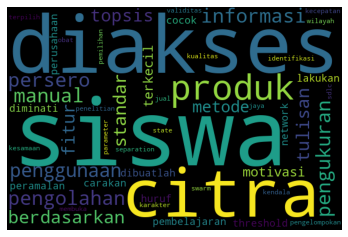

In [ ]:
# topic 0
draw_word_cloud(0)

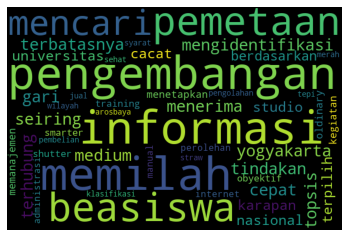

In [ ]:
# topic 1
draw_word_cloud(1)  # ...

## THE END !!!

## [Please star/upvote in case u liked it. ]